In [22]:
import pandas as pd
import os
import json
import numpy as np

In [2]:
os.getcwd()

'/Users/yifengshi/Documents/DSCI550_HW3/source/python_code'

In [4]:
input_data = pd.read_csv("../../data/processed_mac_hw3_inputs.tsv", sep="\t")
input_data = input_data.drop(["Unnamed: 0"], axis=1)
input_data

,Author,Message-From,MboxParser-reply-to,Message-To,Message:Raw-Header:Reply-To,isReconnaissance,isSocialEngineering,isMalware,isCredentialPhishing,isMeetOnline,...,isReceiverFromEduOrUniversity,TTR'ed extracted text,part8_results,part4_800_emails_generated_used_for_Grover,part4 labels,part6 images paths,part7 persona representation paths,part 9 caption image path,part 9 captions,part 10 replies file paths
0,"['MR. JAMES NGOLA.', 'MR. JAMES NGOLA. <james_...",MR. JAMES NGOLA. <james_ngola2002@maktoob.com>,james_ngola2002@maktoob.com,"['webmaster@aclweb.org', 'webmaster@aclweb.org']",james_ngola2002@maktoob.com,False,True,False,False,False,...,False,"['CONFIDENTIAL TEL: 233-27-587908.', 'E-MAIL: ...",machine generated,This was done with my wife during a routine ro...,Credential Phishing,./data/part6//CredentialPhishing/samples_1500_...,./data/part7//CredentialPhishing/samples_1500_...,./output_images_part6/CredentialPhishing/sampl...,a person on a surfboard in the water .,./data/part10/first_email_replies/ordered_list...
1,"['""Mr. Ben Suleman"" <bensul2004nng@spinfinder....",Mr. Ben Suleman <bensul2004nng@spinfinder.com>,0,"['R@M', 'R@M']",0,False,True,False,False,False,...,False,['I am Mr. Ben Suleman a custom officer and wo...,machine generated,.. and a pleasure to write you this letter\n m...,Credential Phishing,./data/part6//CredentialPhishing/samples_1500_...,./data/part7//CredentialPhishing/samples_1500_...,./output_images_part6/CredentialPhishing/sampl...,a bird is standing on the shore of a beach .,./data/part10/first_email_replies/ordered_list...
2,"['""PRINCE OBONG ELEME"" <obong_715@epatra.com>'...",PRINCE OBONG ELEME <obong_715@epatra.com>,obong_715@epatra.com,"['webmaster@aclweb.org', 'webmaster@aclweb.org']",obong_715@epatra.com,False,False,False,False,False,...,False,['This letter might surprise you because we ha...,machine generated,DO NOT VIEW THIS AS BEEN ILLEGAL BUT AN OPPORT...,Credential Phishing,./data/part6//CredentialPhishing/samples_1500_...,./data/part7//CredentialPhishing/samples_1500_...,./output_images_part6/CredentialPhishing/sampl...,a person on a surfboard in the water .,./data/part10/first_email_replies/ordered_list...
3,"['""PRINCE OBONG ELEME"" <obong_715@epatra.com>'...",PRINCE OBONG ELEME <obong_715@epatra.com>,0,"['webmaster@aclweb.org', 'webmaster@aclweb.org']",0,False,False,False,False,False,...,False,['This letter might surprise you because we ha...,machine generated,The following is from a letter sent by me to a...,Credential Phishing,./data/part6//CredentialPhishing/samples_1500_...,./data/part7//CredentialPhishing/samples_1500_...,./output_images_part6/CredentialPhishing/sampl...,a couple of birds that are in the water .,./data/part10/first_email_replies/ordered_list...
4,"['""Maryam Abacha"" <m_abacha03@www.com>', 'Mary...",Maryam Abacha <m_abacha03@www.com>,m_abacha03@www.com,"['R@M', 'R@M']",m_abacha03@www.com,False,True,False,False,False,...,False,['It is with a heart full of hope that I write...,machine generated,SENIOR BUSINESS OFFICER\n\nI am Mr. Abigail Ad...,Credential Phishing,./data/part6//CredentialPhishing/samples_1500_...,./data/part7//CredentialPhishing/samples_1500_...,./output_images_part6/CredentialPhishing/sampl...,a couple of birds that are in the water .,./data/part10/first_email_replies/ordered_list...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,0,0,0,"['undisclosed-recipients:; ', 'undisclosed-rec...",0,False,False,False,False,False,...,False,['I have Paid the fee for your Cheque Draft.Be...,0,0,0,NaN,NaN,NaN,0,NaN
3995,0,0,0,['onuoha5a2003@yahoo.co.jp In brief introducti...,0,False,False,False,False,False,...,False,"['African Development Bank (ADB)', 'Ouagadougo...",0,0,0,NaN,NaN,NaN,0,NaN
3996,0,0,0,['resumes@collarini.com business with you in y...,0,False,False,False,False,False,...,False,"['FROM DR USMAN IBRAHIM DANKO.', 'AUDITING AND...",0,0,0,NaN,NaN,NaN,0,NaN
3997,0,0,alchbak@oran.cc,"['R@S', 'R@S']",alchb

In [14]:
# find the attacker types numbers and save it to json file 
attackerType2occurance = {}

attackerType2occurance["isReconnaissance"] = int(input_data["isReconnaissance"].values.sum())
attackerType2occurance["totalReconnaissance"] = int(input_data["isReconnaissance"].count())

attackerType2occurance["isSocialEngineering"] = int(input_data["isSocialEngineering"].values.sum())
attackerType2occurance["totalSocialEngineering"] = int(input_data["isSocialEngineering"].count())

attackerType2occurance["isMalware"] = int(input_data["isMalware"].values.sum())
attackerType2occurance["totalMalware"] = int(input_data["isMalware"].count())

attackerType2occurance["isCredentialPhishing"] = int(input_data["isCredentialPhishing"].values.sum())
attackerType2occurance["totalCredentialPhishing"] = int(input_data["isCredentialPhishing"].count())

attackerType2occurance["totalEmailsValid"] = int(attackerType2occurance["isReconnaissance"] + attackerType2occurance["isSocialEngineering"] + attackerType2occurance["isMalware"] + attackerType2occurance["isCredentialPhishing"])
attackerType2occurance["totalEmails"] = 3999
attackerType2occurance

{'isReconnaissance': 39,
 'totalReconnaissance': 3999,
 'isSocialEngineering': 1738,
 'totalSocialEngineering': 3999,
 'isMalware': 10,
 'totalMalware': 3999,
 'isCredentialPhishing': 233,
 'totalCredentialPhishing': 3999,
 'totalEmailsValid': 2020,
 'totalEmails': 3999}

In [15]:
# with open("part2_viz1_data.json", "w") as file_write:
#     json.dump(attackerType2occurance, file_write)

### Now for visualization 2 -- sentiment summary 

In [16]:
input_data.columns

Index(['Author', 'Message-From', 'MboxParser-reply-to', 'Message-To',
       'Message:Raw-Header:Reply-To', 'isReconnaissance',
       'isSocialEngineering', 'isMalware', 'isCredentialPhishing',
       'isMeetOnline', 'isFriend', 'isFriendOfFriends', 'isKins',
       'isMetBefore', 'isClaimedToBeSuperior', 'isUrgent', 'attackerOffer',
       'locations', 'sentiment', 'misspellings', 'randomCaps', 'fraudScore',
       'gdpPerCapitaPerCountry', 'emailSenderAge', 'urls', 'anyUrlsInContent',
       'numbersOfUrls', 'areUrlsMalicious', 'createdAt',
       'isReceiverFromEduOrUniversity', 'TTR'ed extracted text',
       'part8_results', 'part4_800_emails_generated_used_for_Grover',
       'part4 labels', 'part6 images paths',
       'part7 persona representation paths', 'part 9 caption image path',
       'part 9 captions', 'part 10 replies file paths'],
      dtype='object')

In [17]:
input_data['sentiment']

0        True
1        True
2        True
3        True
4        True
        ...  
3994     True
3995    False
3996    False
3997     True
3998     True
Name: sentiment, Length: 3999, dtype: bool

In [20]:
sentiment2occurence = {}
sentiment2occurence["positiveSentiment"] = int(input_data["sentiment"].values.sum())
sentiment2occurence["negativeSentiment"] = int((~input_data["sentiment"]).values.sum())
sentiment2occurence["totalSentiment"]= int(input_data["sentiment"].count())
sentiment2occurence

{'positiveSentiment': 3267, 'negativeSentiment': 732, 'totalSentiment': 3999}

In [21]:
with open("part2_viz2_data.json", "w") as file_write:
    json.dump(sentiment2occurence, file_write)

### now for part 3 vizualization

In [23]:
input_data["emailSenderAge"]

0       30
1       34
2       36
3       34
4       33
        ..
3994    39
3995    40
3996    33
3997    39
3998    35
Name: emailSenderAge, Length: 3999, dtype: int64

<AxesSubplot:>

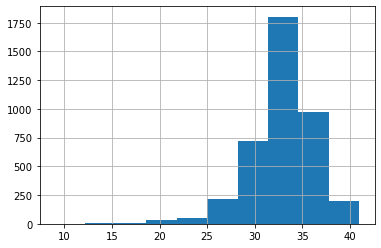

In [24]:
input_data["emailSenderAge"].hist()

In [44]:
input_data["emailSenderAge"].value_counts()
# len(input_data[input_data["emailSenderAge"] == 44])

34    813
33    580
35    546
32    409
30    293
31    288
36    283
37    143
29    137
27     81
28     81
38     81
39     65
40     52
26     32
23     23
25     21
24     20
19     14
21     11
22      7
20      7
16      3
13      3
9       2
18      2
41      1
14      1
Name: emailSenderAge, dtype: int64

In [36]:
series1 = pd.Series(input_data[input_data["emailSenderAge"]==34]["misspellings"])
series1 = series1.astype('int32')
series2 = pd.Series(input_data[input_data["emailSenderAge"]==35]["misspellings"])
series2 = series2.astype('int32')
series = pd.concat([series1, series2])
series = series.dropna()


In [43]:
def aggregate_records_from_age_range(data, start, end, field):
    
    total_series = []
    for i in range(start,end,1):
        if len(data[data["emailSenderAge"]==i]) == 0: continue
        series = pd.Series(data[data["emailSenderAge"]==i][field])
        series = series.astype("int32")
        total_series.append(series)
        
    final_series = pd.concat(total_series)
    final_series = final_series.dropna()
    
    return final_series.tolist()

In [51]:
res = {}
res[str(20) + "_to_" + str(25)] = aggregate_records_from_age_range(input_data,20,25,"misspellings")
res[str(25) + "_to_" + str(30)] = aggregate_records_from_age_range(input_data,25,30,"misspellings")
res[str(30) + "_to_" + str(35)] = aggregate_records_from_age_range(input_data,30,35,"misspellings")
res[str(35) + "_to_" + str(40)] = aggregate_records_from_age_range(input_data,35,40,"misspellings")
res[str(40) + "_to_" + str(45)] = aggregate_records_from_age_range(input_data,40,45,"misspellings")
res

{'20_to_25': [459,
  396,
  322,
  322,
  246,
  116,
  12,
  726,
  324,
  465,
  0,
  356,
  554,
  384,
  544,
  138,
  636,
  5,
  348,
  264,
  0,
  0,
  0,
  298,
  0,
  442,
  137,
  484,
  291,
  183,
  321,
  331,
  392,
  292,
  0,
  0,
  497,
  608,
  0,
  668,
  400,
  355,
  920,
  371,
  268,
  619,
  351,
  0,
  247,
  468,
  627,
  520,
  294,
  469,
  536,
  292,
  292,
  253,
  7,
  347,
  260,
  42,
  379,
  33,
  210,
  0,
  0,
  2],
 '25_to_30': [439,
  476,
  344,
  448,
  159,
  551,
  430,
  560,
  531,
  576,
  485,
  400,
  394,
  548,
  0,
  302,
  144,
  350,
  522,
  304,
  443,
  0,
  620,
  94,
  328,
  253,
  44,
  258,
  512,
  0,
  212,
  277,
  320,
  316,
  386,
  298,
  797,
  300,
  1,
  430,
  423,
  330,
  371,
  86,
  184,
  289,
  432,
  284,
  374,
  0,
  505,
  0,
  0,
  414,
  405,
  376,
  468,
  51,
  0,
  319,
  247,
  463,
  331,
  390,
  355,
  237,
  1,
  330,
  456,
  463,
  503,
  423,
  483,
  390,
  144,
  0,
  441,
  576,
  503,
 

In [52]:
with open("part2_viz3_data_misspellings.json", "w") as file_write:
    json.dump(res, file_write)
file_write.close()

In [53]:
res = {}
res[str(20) + "_to_" + str(25)] = aggregate_records_from_age_range(input_data,20,25,"randomCaps")
res[str(25) + "_to_" + str(30)] = aggregate_records_from_age_range(input_data,25,30,"randomCaps")
res[str(30) + "_to_" + str(35)] = aggregate_records_from_age_range(input_data,30,35,"randomCaps")
res[str(35) + "_to_" + str(40)] = aggregate_records_from_age_range(input_data,35,40,"randomCaps")
res[str(40) + "_to_" + str(45)] = aggregate_records_from_age_range(input_data,40,45,"randomCaps")
res

{'20_to_25': [5,
  2,
  8,
  3,
  7,
  192,
  0,
  9,
  10,
  5,
  0,
  4,
  5,
  20,
  10,
  8,
  4,
  0,
  7,
  4,
  0,
  0,
  0,
  3,
  0,
  6,
  5,
  2,
  8,
  12,
  5,
  64,
  2,
  6,
  0,
  0,
  8,
  5,
  0,
  6,
  1,
  1,
  1,
  4,
  2,
  0,
  4,
  0,
  1,
  9,
  8,
  16,
  5,
  22,
  17,
  6,
  6,
  7,
  2,
  8,
  19,
  23,
  7,
  0,
  3,
  0,
  0,
  0],
 '25_to_30': [12,
  3,
  13,
  15,
  1,
  8,
  8,
  5,
  8,
  8,
  10,
  9,
  20,
  7,
  0,
  9,
  6,
  4,
  0,
  10,
  22,
  0,
  17,
  7,
  8,
  5,
  2,
  6,
  7,
  0,
  7,
  9,
  0,
  2,
  11,
  2,
  24,
  5,
  0,
  3,
  6,
  7,
  0,
  1,
  10,
  3,
  8,
  8,
  8,
  0,
  7,
  0,
  0,
  6,
  18,
  4,
  21,
  0,
  0,
  6,
  0,
  14,
  1,
  9,
  54,
  0,
  1,
  1,
  2,
  28,
  7,
  6,
  14,
  19,
  2,
  0,
  2,
  9,
  2,
  4,
  0,
  13,
  1,
  5,
  3,
  2,
  0,
  8,
  2,
  18,
  0,
  3,
  0,
  3,
  5,
  14,
  1,
  11,
  5,
  3,
  3,
  2,
  21,
  4,
  6,
  13,
  9,
  3,
  2,
  8,
  2,
  6,
  4,
  0,
  5,
  0,
  4,
  7,
  0,
  5,

In [54]:
with open("part2_viz3_data_randomCaps.json", "w") as file_write:
    json.dump(res, file_write)
file_write.close()